# BrainStation Admission Challenge

You were approached by the executive team of a small board game company seeking assistance with setting up their Kickstarter campaign. They must decide how much money to ask for and how to price special deals they want to offer to early backers/supporters (called rewards).

The team has decided that they will need a minimum of $15,000 USD to get this project off the ground.
However, they have ambitions of expanding the business and would like to maximize their funding.

### List of Mandatory questions:

1. Are the goals of successful and unsuccessful campaigns significantly different?
2. How do successful and unsuccessful campaigns differ in terms of numbers of backers?
3. Which categories/subcategories are commonly successful and unsuccessful?
4. How are the pledge/donation amounts and rewards commonly related?
5. Is there an impact on the duration of the campaign?
6. What are year-over-year trends Kickstarter campaigns that can help assess it as a platform?

My questions focus on the aspect of Games categories and are embedded in the 6 mandatory questions.

My additional question is "What is the stat for successful tabletop games campaign?"

In [15]:
# Import all of the required libraries 

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

### 1. Are the goals of successful and unsuccessful campaigns significantly different?

In order to answer this question, a CSV file showing goal and success outcome of each campaign is created and used.

A scatter plot is used to analyze the difference between failed and success campaign.

The average goal of the successful campaigns is 15463.0 USD
The average goal of the failed campaigns is 48902.0 USD


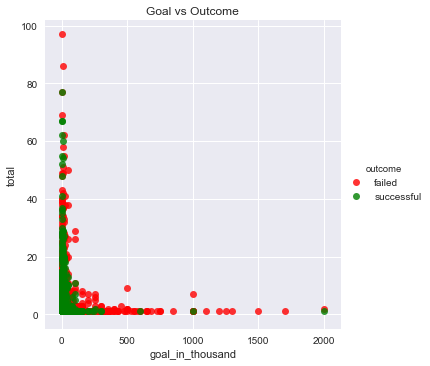

In [20]:
df = pd.read_csv('goal_success.csv')

df_success = df[df.outcome=='successful']
df_failed = df[df.outcome=='failed']

color_dict = {'successful':'green','failed':'red'}
sns.lmplot(x='goal_in_thousand', y='total', data=df,
           fit_reg=False, # No regression line
           hue='outcome', # Color by evolution stage
            palette=color_dict)   
plt.title('Goal vs Outcome')

print """The average goal of the successful campaigns is""", round(df_success['goal_in_thousand'].mean()*1000), "USD"
print """The average goal of the failed campaigns is""", round(df_failed['goal_in_thousand'].mean()*1000), "USD"

plt.show()


#### The chart shows that the goals are significantly different between successful and failed campaigns.

- Campaigns with higher goal is more likely to fail. 
- The successful ones are clusterred in the lower end.
- The campaign that acheieves the highest goal stands at 2,000,0000 USD. Any campaign with a higher goal fails.
- However, the distribution of sucess in the Games category is wider toward a higher goal.

An average goal of the successful campaigns in game category is 27045.0 USD


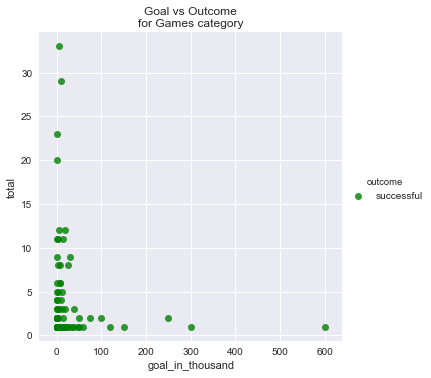

In [21]:
df_game = df[df.category_name == 'Games']
df_game_success = df_game[df_game.outcome == 'successful']
sns.lmplot(x='goal_in_thousand', y='total', data=df_game_success,
           fit_reg=False, # No regression line
           hue='outcome',   # Color by evolution stage
            palette=color_dict)
plt.title('Goal vs Outcome\n'
          'for Games category')

print """An average goal of the successful campaigns in game category is""", round(df_game_success['goal_in_thousand'].mean()*1000), "USD"

plt.show()


From the data, campaigns in the Games category are more likely to be successful with higher goals. <br>
As a result, it is possible to set a goal between 15,000 and 27,000 USD and have a great chance of success. <br>

### 2. How do successful and unsuccessful campaigns differ in terms of numbers of backers?

In order to answer this question, a CSV file showing number of backer and success outcome of each campaign is created and used.

A scatter plot is used to analyze the difference between the number of backger of failed and success campaign.

The average number of backers for the successful campaigns is 291.0
The average number of backers for the failed campaigns is 79.0


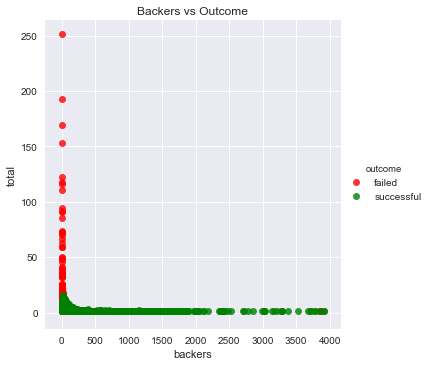

In [16]:
df = pd.read_csv('backer_success.csv')

df_success = df[df.outcome=='successful']
df_failed = df[df.outcome=='failed']

color_dict = {'successful':'green','failed':'red'}

sns.lmplot(x='backers', y='total', data=df,
           fit_reg=False, # No regression line
           hue='outcome', # Color by evolution stage
            palette=color_dict)   
plt.title('Backers vs Outcome')

print """The average number of backers for the successful campaigns is""", round(df_success['backers'].mean(), 0)
print """The average number of backers for the failed campaigns is""", round(df_failed['backers'].mean(), 0)

plt.show()


The number of backers are significantly different between successful and failed campaigns. <br>
The campaign with the highest number of backers that fails has 3873 backers <br>
It is clear that the more backers the campaign has, the better chance it will be successful. <br>

#### Now we will focus on the game category

The average number of backers for the successful Games campaigns is 498.0
The average number of backers for the failed Games campaigns is 163.0


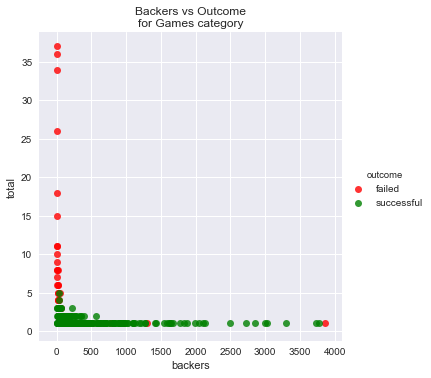

In [19]:

df_game = df[df.category_name == 'Games']

sns.lmplot(x='backers', y='total', data=df_game,
           fit_reg=False, # No regression line
           hue='outcome', # Color by evolution stage
            palette=color_dict)   
plt.title('Backers vs Outcome\n'
         'for Games category')

print """The average number of backers for the successful Games campaigns is""", round(df_success_game['backers'].mean(), 0)
print """The average number of backers for the failed Games campaigns is""", round(df_failed_game['backers'].mean(), 0)
plt.show()

From the data, Games category require more backers in order to be successful

### 3. Which categories/subcategories are commonly successful and unsuccessful?

In order to answer this question, a CSV file showing category and success outcome of each campaign is created and used.<br>

A bar plot is used to show the failed and success ratio in each category.

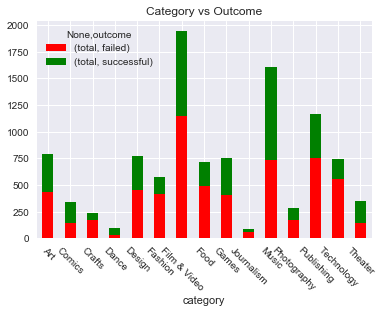

In [23]:
df = pd.read_csv('category_success.csv')

df_category = df.groupby(['outcome','category']).sum()

df_category.unstack('outcome').plot(kind='bar',stacked=True, color=['red','green'])

plt.title('Category vs Outcome')
plt.xticks(rotation=-45)
plt.show()


From the chart, comic, theater, and music campaigns are the most successful. <br>

On the other hand, crafts, fashion, food, technology, and journalism are the categories that are mostly unsuccessful. <br>

Next, we look at the ratio of each sub-category in the games category. <br>

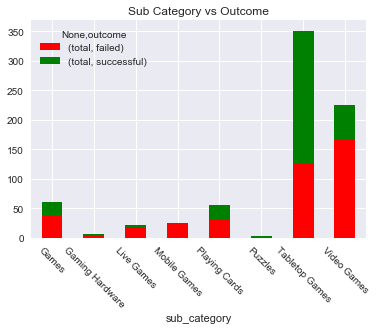

In [24]:
df_games = df[df.category=='Games']
df_subcategory = df_games.groupby(['outcome','sub_category']).sum()

df_subcategory.unstack('outcome').plot(kind='bar',stacked=True, color=['red','green'])

plt.title('Sub Category vs Outcome')
plt.xticks(rotation=-45)
plt.show()

From the chart, only the tabletop games campaign has the best chance to be successful

### 4. How are the pledge/donation amounts and rewards commonly related?

a CSV file showing pledged amount and goal of each campaign is created and used. <br>

A bar chart is used to show the differece between goal and pledged amount in each category. <br>

Since there is no columns for rewards, we will look at the average of goals, pledged and differences between the two in each category instead. <br>

And to get rid of trolls, we filter out campaigns that have zero pledged. <br>


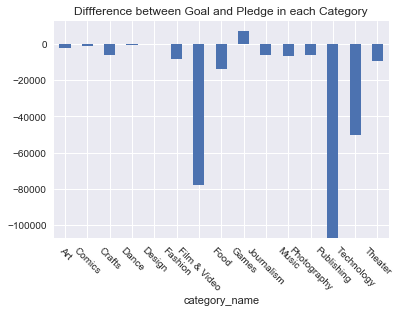

In [26]:
df = pd.read_csv('pledged_goal.csv')

df['Difference'] = df.pledged - df.goal

df = df[df['pledged']>0]

df_difference = df.groupby(['category_name']).mean().round()

df_difference['Difference'].plot(kind='bar')
plt.title('Diffference between Goal and Pledge in each Category')
plt.xticks(rotation=-45)
plt.show()

It shows that "Games" is the only category that the average pledge has outweight the goal. <br>
Another interesting findings is that technology and fimls & video have the most negative differences between pledged and goals. <br>

### 5. Is there an impact on the duration of the campaign?

a CSV file showing length of the campaigns and success outcome is created and used. <br>

First, we look at the distribution of success ratio in each range.

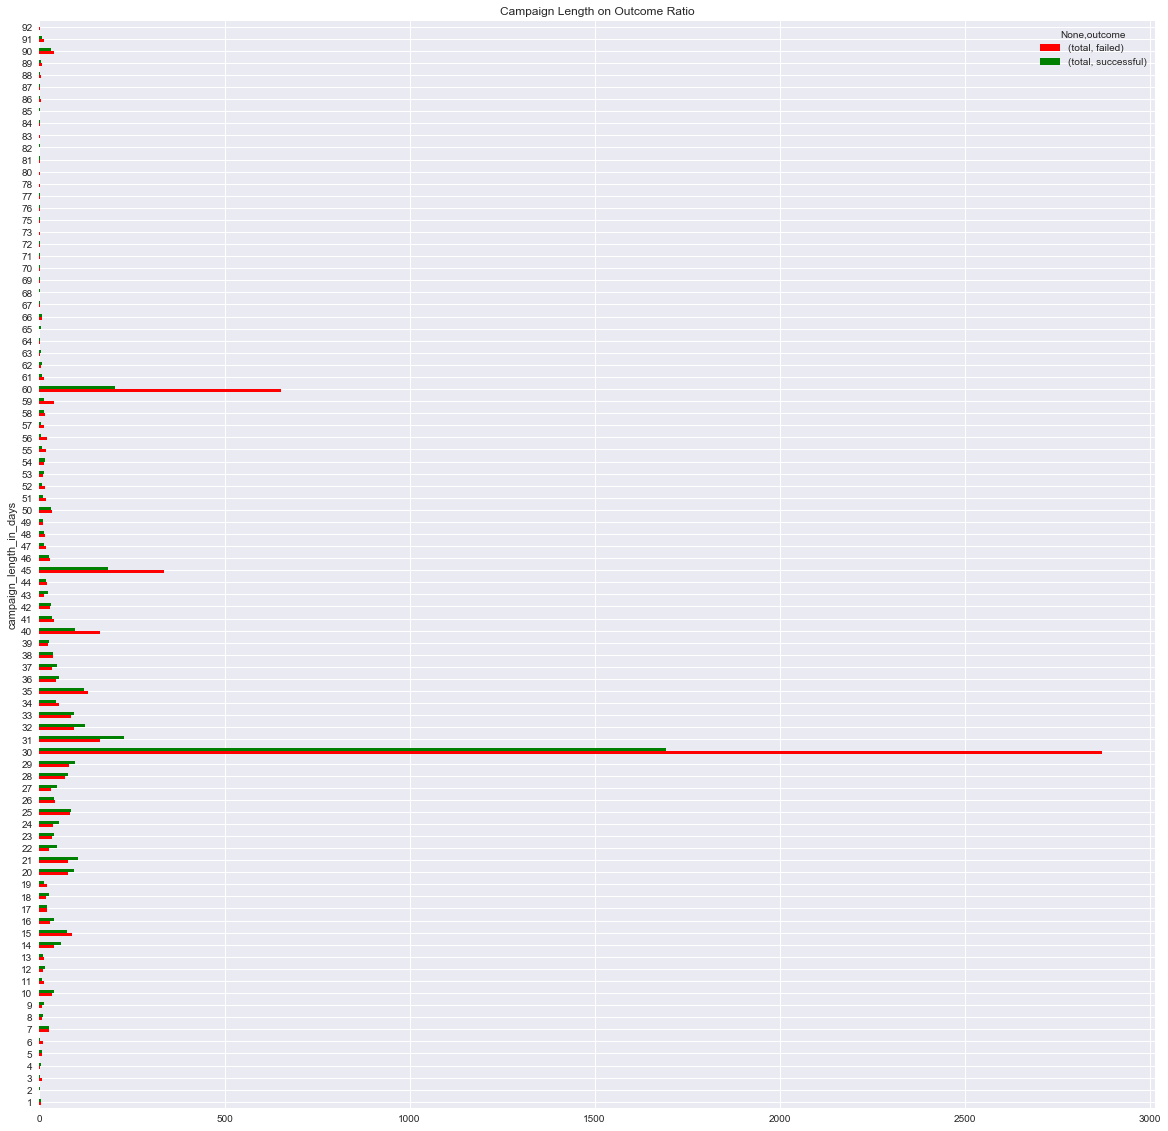

In [28]:
df = pd.read_csv('length_outcome.csv')
df_sum = df.groupby(['outcome', 'campaign_length_in_days']).sum()
df_sum.unstack('outcome').plot(kind='barh', figsize=(20,20), color=['red','green'])

plt.title('Campaign Length on Outcome Ratio')
plt.show()

The chart shows that in general, campaigns that last between 20 to 33 days gives the best result. <br>

Then, we look at the distribution of success ratio in each range in games category. 


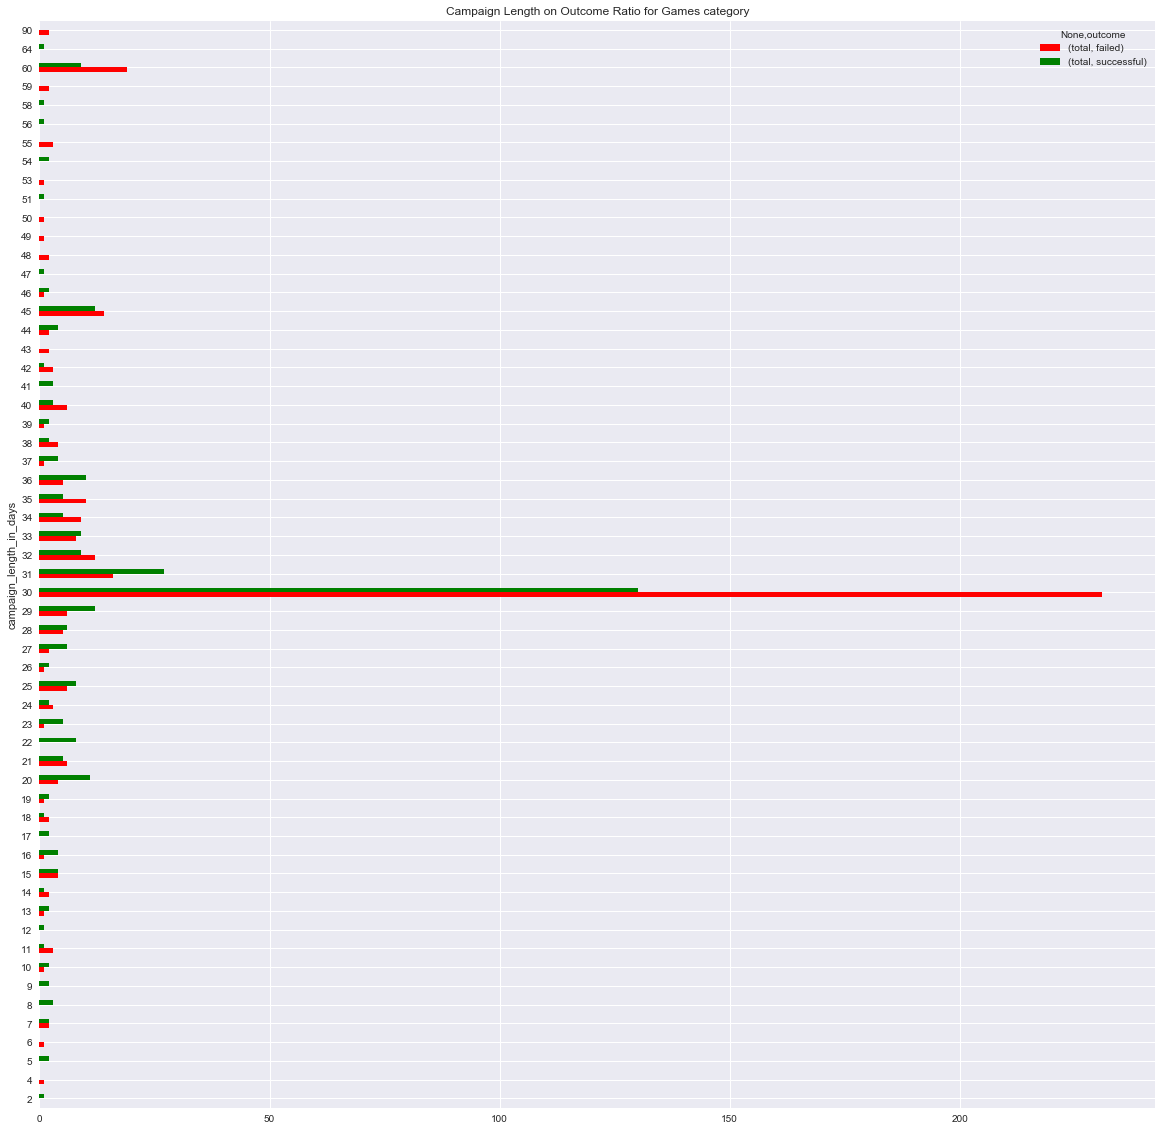

In [30]:
df = df[df['category_name']=='Games']
df_sum = df.groupby(['outcome', 'campaign_length_in_days']).sum()
df_sum.unstack('outcome').plot(kind='barh', figsize=(20,20), color=['red','green'])

plt.title('Campaign Length on Outcome Ratio for Games category')
plt.show()

The chart shows that campaigns that last about 16 to 31 days yield the best result for games category.

### 6. What are year-over-year trends Kickstarter campaigns that can help assess it as a platform?

a CSV file showing success outcome and the year is created and used. <br>

First, we look at the distribution of fail and success in each year

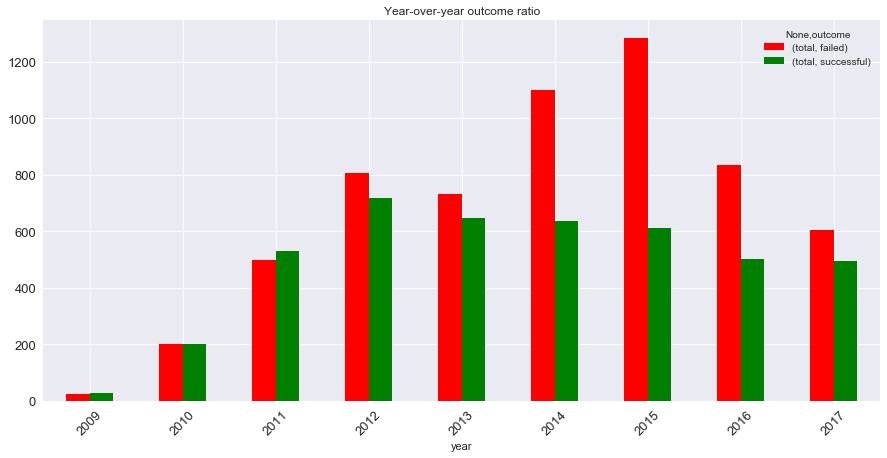

In [32]:
df = pd.read_csv('outcome_year.csv')
df_sum = df.groupby(['outcome', 'year']).sum()

df_sum.unstack('outcome').plot(kind='bar', color=['red','green'], figsize=(15,7), fontsize=13)
plt.title('Year-over-year outcome ratio')
plt.xticks(rotation=45)
plt.show()

The chart shows that Kickstarter platform starts off with a balanced ratio of failed and successful campaign. <br>

However, 2014 to 2016 shows an incresing rate of failure but it is coming back to balances in the year of 2017. <br>

Next, we look at year-over-year trend on Games category.

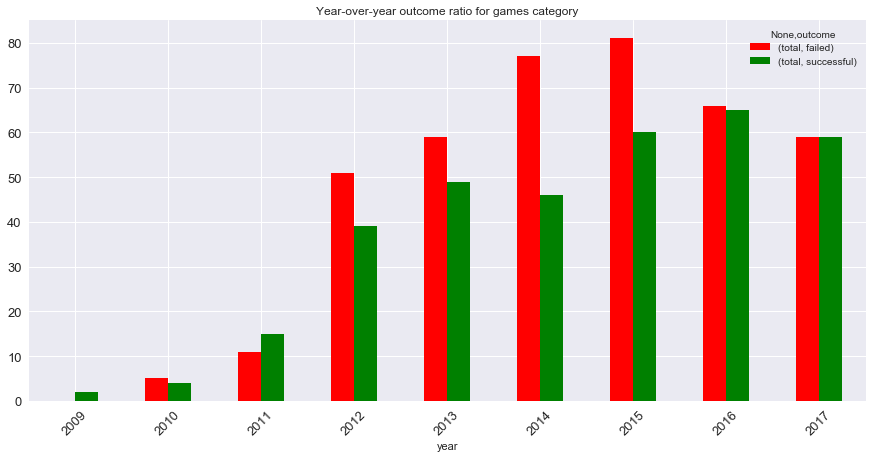

In [35]:
df_games = df[df['category_name']=='Games'] 
df_sum = df_games.groupby(['outcome', 'year']).sum()

df_sum.unstack('outcome').plot(kind='bar', color=['red','green'], figsize=(15,7), fontsize=13)
plt.title('Year-over-year outcome ratio for games category')
plt.xticks(rotation=45)
plt.show()

The result shows that Games category are doing better than the average in terms of successful campaign.

### BONUS: What is the stat for tabletop games campaign?

a CSV showing every detail for tabletop game category is created and used.

In [37]:
df = pd.read_csv('tabletop_games.csv')
# df_successful = df[df['outcome']=='successful'] 
df_mean = df.groupby(['outcome', 'year']).mean().round()
df_std = df.groupby(['outcome', 'year']).std().round()
df_max = df.groupby(['outcome', 'year']).max().round()
df_min = df.groupby(['outcome', 'year']).min().round()

print "Average stat"
print df_mean

Average stat
                 campaign_length_in_days     goal   pledged  backers
outcome    year                                                     
failed     2010                     90.0   2000.0       0.0      0.0
           2011                     44.0   8875.0     618.0     19.0
           2012                     36.0  12112.0    1788.0     40.0
           2013                     32.0  24092.0    3477.0     82.0
           2014                     33.0  30570.0    2466.0     48.0
           2015                     30.0  15123.0    3698.0     77.0
           2016                     31.0  14039.0    4621.0     66.0
           2017                     35.0  17210.0    3670.0     43.0
successful 2010                     46.0   3000.0    3327.0     48.0
           2011                     49.0   6612.0   14426.0    328.0
           2012                     35.0  10316.0   37980.0    391.0
           2013                     30.0  14043.0   84708.0    942.0
           2014      

In [39]:
print "Standard Deviation stat"
print df_std

Standard Deviation stat
                 campaign_length_in_days     goal   pledged  backers
outcome    year                                                     
failed     2010                      NaN      NaN       NaN      NaN
           2011                     16.0  10804.0     705.0     18.0
           2012                      9.0  12256.0    2639.0     58.0
           2013                      7.0  27996.0    3649.0     97.0
           2014                     11.0  53777.0    4406.0     61.0
           2015                      4.0  13293.0    6173.0    131.0
           2016                      4.0  15105.0    9258.0    113.0
           2017                      9.0  17100.0    7096.0     62.0
successful 2010                      NaN      NaN       NaN      NaN
           2011                     13.0   6787.0   14641.0    285.0
           2012                     11.0   9505.0   68930.0    543.0
           2013                     10.0  19663.0  241381.0   2358.0
          

In [40]:
print "Max"
print df_max

Max
                 campaign_length_in_days    goal    pledged  backers
outcome    year                                                     
failed     2010                       90    2000        0.0        0
           2011                       60   25000     1621.0       41
           2012                       59   40000     8171.0      202
           2013                       48  110000    13348.0      431
           2014                       60  250000    18650.0      236
           2015                       44   50000    26271.0      591
           2016                       43   65000    36981.0      464
           2017                       60   60000    27268.0      214
successful 2010                       46    3000     3327.0       48
           2011                       60   20000    34437.0      814
           2012                       60   30000   243945.0     2045
           2013                       60  100000  1341305.0    13765
           2014               

In [41]:
print "Min"
print df_min

Min
                 campaign_length_in_days  goal  pledged  backers
outcome    year                                                 
failed     2010                       90  2000      0.0        0
           2011                       30  2500    110.0        2
           2012                       30   400     85.0        3
           2013                       13  2500      2.0        1
           2014                       15   100      0.0        0
           2015                       18   800      0.0        0
           2016                       24   500      1.0        1
           2017                       14  2000     56.0        1
successful 2010                       46  3000   3327.0       48
           2011                       30   500    813.0       30
           2012                       10   500   1003.0       20
           2013                        5    88   1322.0       35
           2014                       10   500    965.0        8
           2015      